In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install matplotlib
# !pip install wordcloud

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## import dtale
pd.set_option('display.max_columns', None)

# import module
from geopy.geocoders import Nominatim

# initialize Nominatim API 
geolocator = Nominatim(user_agent="GetLoc")

import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import matplotlib.ticker as ticker

In [4]:
Crash_df = pd.read_csv(r"Data\Motor_Vehicle_Collisions_-_Crashes_20231209.csv")

Crash_df = Crash_df[['COLLISION_ID','CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
        'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']]


###### Consider only from 2020 Year
Crash_df = Crash_df[pd.to_datetime(Crash_df['CRASH DATE']) >= '2020-01-01'].reset_index(drop=True)


Crash_df.head(2)

,COLLISION_ID,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,4455765,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,2.0,0.0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,4513547,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,1.0,0.0,0,0,0,0,1,0,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN


In [5]:
len(Crash_df)

416468

In [3]:
People_df = pd.read_csv(r"Data/Motor_Vehicle_Collisions_-_Person_20231209.csv")

###### Consider only from 2020 Year
## People_df = People_df[pd.to_datetime(People_df['CRASH_DATE']) >= '2020-01-01'].reset_index(drop=True)

People_df.head(2)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,10249006,4229554,10/26/2019,9:43,31aa2bc0-f545-444f-8cdb-f1cb5cf00b89,Occupant,Unspecified,19141108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,U
1,10255054,4230587,10/25/2019,15:15,4629e500-a73e-48dc-b8fb-53124d124b80,Occupant,Unspecified,19144075.0,33.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F


In [4]:
People_df['COLLISION_ID'].nunique(), len(People_df)

(1419089, 5225095)

In [5]:
####### Considering only Collisions matching

People_df = People_df[People_df['COLLISION_ID'].isin(list(Crash_df['COLLISION_ID'].unique()))].reset_index(drop=True)
People_df.head(2)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,11318006,4322803,06/22/2020,12:06,b74c7b2f-b051-45bb-a4ae-a3ab3e5855db,Occupant,Injured,19694433.0,3.0,Not Ejected,Conscious,Head,"Middle rear seat, or passenger lying across a ...",Child Restraint Only,NaN,NaN,Whiplash,Passenger,NaN,NaN,M
1,11319591,4323168,06/22/2020,12:00,1dbe540b-9bfa-4d9e-800c-ed7e3c762025,Occupant,Unspecified,19695344.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M


In [6]:
People_df['COLLISION_ID'].nunique(), len(People_df)

(414837, 1475198)

In [7]:
###### Missing values Percentage

People_null_percentage = (People_df.isnull().mean() * 100).round(0)
People_null_percentage

UNIQUE_ID                 0.0
COLLISION_ID              0.0
CRASH_DATE                0.0
CRASH_TIME                0.0
PERSON_ID                 0.0
PERSON_TYPE               0.0
PERSON_INJURY             0.0
VEHICLE_ID                4.0
PERSON_AGE               20.0
EJECTION                 48.0
EMOTIONAL_STATUS         46.0
BODILY_INJURY            46.0
POSITION_IN_VEHICLE      48.0
SAFETY_EQUIPMENT         48.0
PED_LOCATION             98.0
PED_ACTION               98.0
COMPLAINT                46.0
PED_ROLE                  0.0
CONTRIBUTING_FACTOR_1    98.0
CONTRIBUTING_FACTOR_2    98.0
PERSON_SEX                9.0
dtype: float64

In [8]:
# # Set a threshold for deleting columns
# threshold = 40

# # Drop columns with null value percentage greater than the threshold
# People_columns_to_drop = People_null_percentage[People_null_percentage > threshold].index
# People_df.drop(People_columns_to_drop, axis=1, inplace=True)


# People_df.head(2)

In [9]:
###### Missing values Percentage

People_null_percentage = (People_df.isnull().mean() * 100).round(0)
People_null_percentage

UNIQUE_ID                 0.0
COLLISION_ID              0.0
CRASH_DATE                0.0
CRASH_TIME                0.0
PERSON_ID                 0.0
PERSON_TYPE               0.0
PERSON_INJURY             0.0
VEHICLE_ID                4.0
PERSON_AGE               20.0
EJECTION                 48.0
EMOTIONAL_STATUS         46.0
BODILY_INJURY            46.0
POSITION_IN_VEHICLE      48.0
SAFETY_EQUIPMENT         48.0
PED_LOCATION             98.0
PED_ACTION               98.0
COMPLAINT                46.0
PED_ROLE                  0.0
CONTRIBUTING_FACTOR_1    98.0
CONTRIBUTING_FACTOR_2    98.0
PERSON_SEX                9.0
dtype: float64

In [10]:
People_df['PERSON_TYPE'].value_counts()

Occupant           1406745
Pedestrian           34524
Bicyclist            25489
Other Motorized       8440
Name: PERSON_TYPE, dtype: int64

In [11]:
People_df['PERSON_INJURY'].value_counts()

Unspecified    1275769
Injured         198326
Killed            1103
Name: PERSON_INJURY, dtype: int64

In [12]:
People_df['PED_ROLE'].value_counts()

Registrant         637154
Driver             550625
Passenger          212625
Pedestrian          34524
Witness             23689
Owner               11979
Notified Person      3792
Other                 666
In-Line Skater        141
Name: PED_ROLE, dtype: int64

In [13]:
# Calculate the skewness
Age_skewness = People_df['PERSON_AGE'].skew()

print(f"Skewness of the PersonAge column: {Age_skewness}")

# Interpret the skewness value
if Age_skewness > 1:
    print("Highly positively skewed")
elif Age_skewness > 0.5:
    print("Moderately positively skewed")
elif Age_skewness > -0.5:
    print("Approximately symmetric")
elif Age_skewness > -1:
    print("Moderately negatively skewed")
else:
    print("Highly negatively skewed")

Skewness of the PersonAge column: 90.50424678753085
Highly positively skewed


In [14]:

######## 

# Assuming 'df' is your DataFrame with the 'PersonAge' column.
Q1 = People_df['PERSON_AGE'].quantile(0.25)
Q3 = People_df['PERSON_AGE'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers = People_df[(People_df['PERSON_AGE'] < lower_bound) | (People_df['PERSON_AGE'] > upper_bound)]


People_df = People_df[~People_df['COLLISION_ID'].isin(list(outliers['COLLISION_ID'].unique()))].reset_index(drop=True)


###### Filling out persons age with median as the data is highly skewed
median_age = People_df['PERSON_AGE'].median()
People_df['PERSON_AGE'].fillna(median_age, inplace=True)


People_df.head(2)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,11318006,4322803,06/22/2020,12:06,b74c7b2f-b051-45bb-a4ae-a3ab3e5855db,Occupant,Injured,19694433.0,3.0,Not Ejected,Conscious,Head,"Middle rear seat, or passenger lying across a ...",Child Restraint Only,NaN,NaN,Whiplash,Passenger,NaN,NaN,M
1,11319591,4323168,06/22/2020,12:00,1dbe540b-9bfa-4d9e-800c-ed7e3c762025,Occupant,Unspecified,19695344.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M


In [15]:
# Get the distribution of the 'PersonSex' column
sex_distribution = People_df['PERSON_SEX'].value_counts(normalize=True)

# Print the distribution
print(sex_distribution)

# Check if the distribution is uniform
# This is a simple check to see if any value count is significantly different from the others
is_uniform = all(abs(count - 1/len(sex_distribution)) < 0.1 for count in sex_distribution)
print(f"Is the 'PersonSex' column uniformly distributed? {is_uniform}")

M    0.626968
F    0.307315
U    0.065717
Name: PERSON_SEX, dtype: float64
Is the 'PersonSex' column uniformly distributed? False


In [16]:
# Calculate the mode of the 'PersonSex' column
mode_sex = People_df['PERSON_SEX'].mode()[0]

# Fill in missing values with the mode
People_df['PERSON_SEX'].fillna(mode_sex, inplace=True)

People_df.head(2)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,PERSON_ID,PERSON_TYPE,PERSON_INJURY,VEHICLE_ID,PERSON_AGE,EJECTION,EMOTIONAL_STATUS,BODILY_INJURY,POSITION_IN_VEHICLE,SAFETY_EQUIPMENT,PED_LOCATION,PED_ACTION,COMPLAINT,PED_ROLE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,PERSON_SEX
0,11318006,4322803,06/22/2020,12:06,b74c7b2f-b051-45bb-a4ae-a3ab3e5855db,Occupant,Injured,19694433.0,3.0,Not Ejected,Conscious,Head,"Middle rear seat, or passenger lying across a ...",Child Restraint Only,NaN,NaN,Whiplash,Passenger,NaN,NaN,M
1,11319591,4323168,06/22/2020,12:00,1dbe540b-9bfa-4d9e-800c-ed7e3c762025,Occupant,Unspecified,19695344.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M


In [17]:
###### Missing values Percentage

People_null_percentage = (People_df.isnull().mean() * 100).round(0)
People_null_percentage

UNIQUE_ID                 0.0
COLLISION_ID              0.0
CRASH_DATE                0.0
CRASH_TIME                0.0
PERSON_ID                 0.0
PERSON_TYPE               0.0
PERSON_INJURY             0.0
VEHICLE_ID                4.0
PERSON_AGE                0.0
EJECTION                 48.0
EMOTIONAL_STATUS         46.0
BODILY_INJURY            46.0
POSITION_IN_VEHICLE      48.0
SAFETY_EQUIPMENT         48.0
PED_LOCATION             98.0
PED_ACTION               98.0
COMPLAINT                46.0
PED_ROLE                  0.0
CONTRIBUTING_FACTOR_1    98.0
CONTRIBUTING_FACTOR_2    98.0
PERSON_SEX                0.0
dtype: float64

In [ ]:
###### Drop Vehicle ID's as we need to map it with vehicles data

People_df.dropna(subset = ['VEHICLE_ID'], inplace=True)
People_df.head(2)

In [18]:
###### Missing values Percentage

People_null_percentage = (People_df.isnull().mean() * 100).round(0)
People_null_percentage

UNIQUE_ID                 0.0
COLLISION_ID              0.0
CRASH_DATE                0.0
CRASH_TIME                0.0
PERSON_ID                 0.0
PERSON_TYPE               0.0
PERSON_INJURY             0.0
VEHICLE_ID                4.0
PERSON_AGE                0.0
EJECTION                 48.0
EMOTIONAL_STATUS         46.0
BODILY_INJURY            46.0
POSITION_IN_VEHICLE      48.0
SAFETY_EQUIPMENT         48.0
PED_LOCATION             98.0
PED_ACTION               98.0
COMPLAINT                46.0
PED_ROLE                  0.0
CONTRIBUTING_FACTOR_1    98.0
CONTRIBUTING_FACTOR_2    98.0
PERSON_SEX                0.0
dtype: float64

In [19]:
################## Renaming Columns


# Function to convert to CamelCase with the first letter of the first word also capitalized
def to_camel_case(s):
    # Split the string into words based on underscores
    words = s.split('_')
    # Capitalize all words
    return ''.join(word.capitalize() for word in words)

# Apply the function to your columns
People_df.columns = [to_camel_case(column) for column in People_df.columns]

People_df.head(2)

,UniqueId,CollisionId,CrashDate,CrashTime,PersonId,PersonType,PersonInjury,VehicleId,PersonAge,Ejection,EmotionalStatus,BodilyInjury,PositionInVehicle,SafetyEquipment,PedLocation,PedAction,Complaint,PedRole,ContributingFactor1,ContributingFactor2,PersonSex
0,11318006,4322803,06/22/2020,12:06,b74c7b2f-b051-45bb-a4ae-a3ab3e5855db,Occupant,Injured,19694433.0,3.0,Not Ejected,Conscious,Head,"Middle rear seat, or passenger lying across a ...",Child Restraint Only,NaN,NaN,Whiplash,Passenger,NaN,NaN,M
1,11319591,4323168,06/22/2020,12:00,1dbe540b-9bfa-4d9e-800c-ed7e3c762025,Occupant,Unspecified,19695344.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M


In [20]:
###### Converting DataTypes

People_df['CrashDate'] = pd.to_datetime(People_df['CrashDate']).dt.date
People_df['CrashTime'] = pd.to_datetime(People_df['CrashTime']).dt.time
People_df['CollisionId'] = People_df['CollisionId'].fillna(0).astype(int)
People_df['UniqueId'] = People_df['UniqueId'].fillna(0).astype(int)


People_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1466521 entries, 0 to 1466520
Data columns (total 21 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   UniqueId             1466521 non-null  int32  
 1   CollisionId          1466521 non-null  int32  
 2   CrashDate            1466521 non-null  object 
 3   CrashTime            1466521 non-null  object 
 4   PersonId             1466521 non-null  object 
 5   PersonType           1466521 non-null  object 
 6   PersonInjury         1466521 non-null  object 
 7   VehicleId            1403973 non-null  float64
 8   PersonAge            1466521 non-null  float64
 9   Ejection             759793 non-null   object 
 10  EmotionalStatus      793386 non-null   object 
 11  BodilyInjury         793386 non-null   object 
 12  PositionInVehicle    759910 non-null   object 
 13  SafetyEquipment      759880 non-null   object 
 14  PedLocation          35074 non-null    object 
 15

# EDA (Exploratary Data Analysis)

In [ ]:
People_df.head(2)

In [21]:
def Category_Barchart(x_column, y_column, xlabel, ylabel, title):

    # Barchart Data
    Barchart_data = People_df.groupby(x_column)[y_column].nunique()

    ##### Sorting values
    Barchart_data = Barchart_data.sort_values(ascending=False)


    # Plotting the bar chart
    ax = Barchart_data.plot(kind='bar', figsize=(10,6))

    # Set the y-axis formatter to display full numbers
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


    # Adding labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot

    return plt.show()

In [22]:
Barchart_data = People_df.groupby('PersonType')['CollisionId'].nunique()
Barchart_data

PersonType
Bicyclist           24310
Occupant           399211
Other Motorized      7845
Pedestrian          32702
Name: CollisionId, dtype: int64

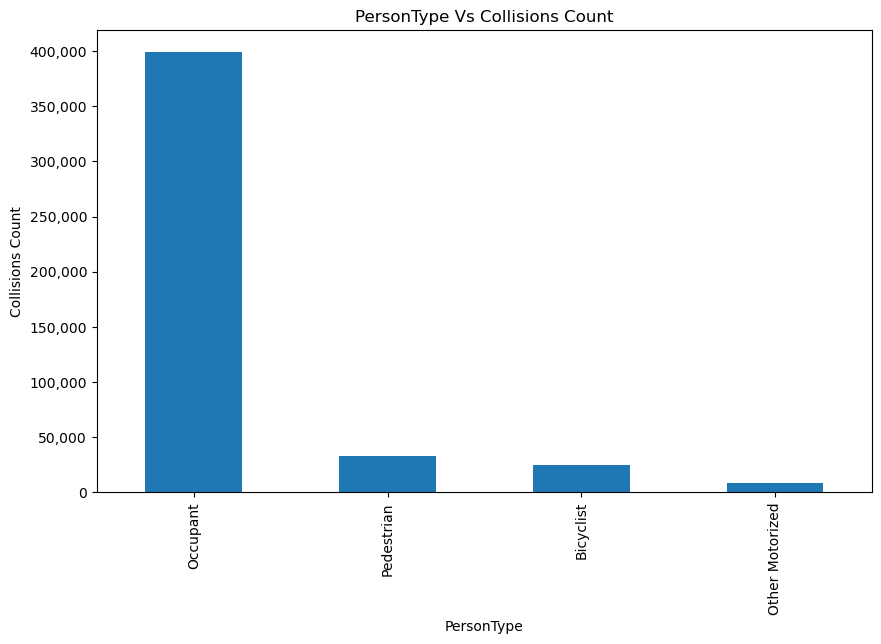

In [23]:
Category_Barchart('PersonType', 'CollisionId', 'PersonType', 'Collisions Count', 'PersonType Vs Collisions Count')

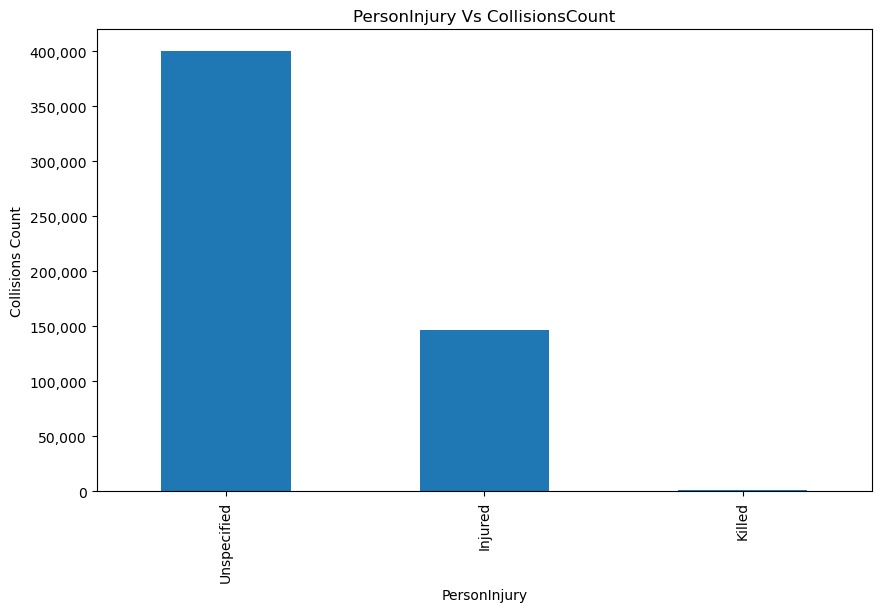

In [24]:
Category_Barchart('PersonInjury', 'CollisionId', 'PersonInjury', 'Collisions Count', 'PersonInjury Vs CollisionsCount')

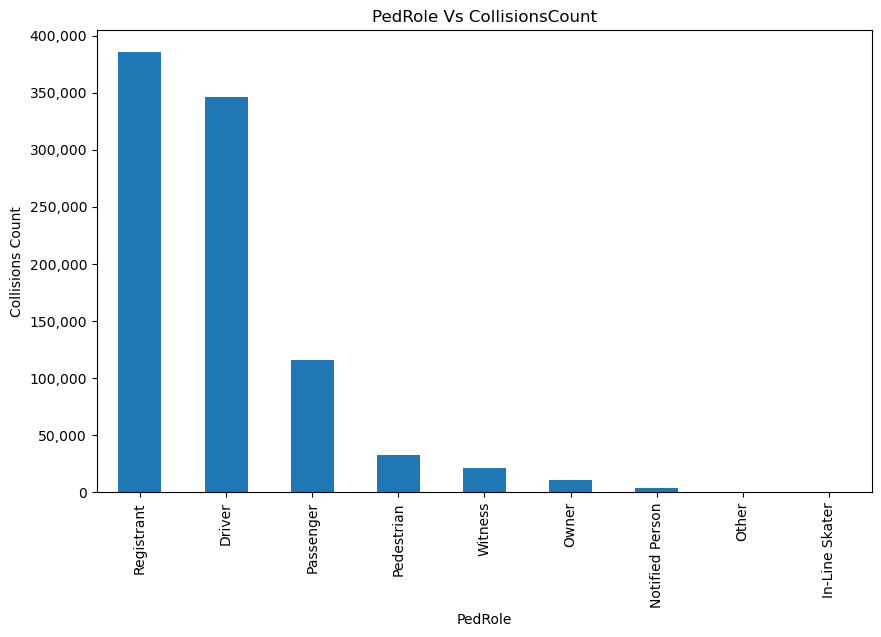

In [25]:
Category_Barchart('PedRole', 'CollisionId', 'PedRole', 'Collisions Count', 'PedRole Vs CollisionsCount')

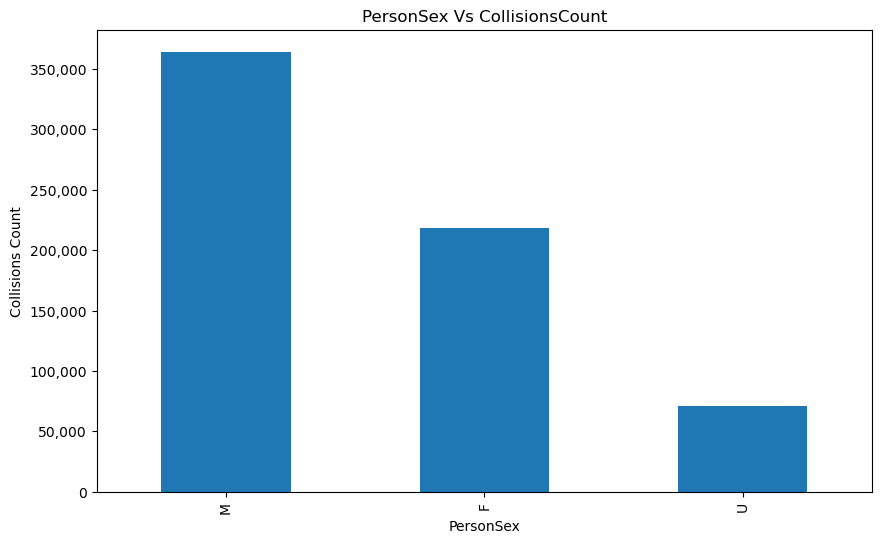

In [26]:
Category_Barchart('PersonSex', 'CollisionId', 'PersonSex', 'Collisions Count', 'PersonSex Vs CollisionsCount')

In [27]:
People_df.groupby(['PersonType','PersonInjury'])['CollisionId'].nunique()

PersonType       PersonInjury
Bicyclist        Injured          19968
                 Killed              92
                 Unspecified       4719
Occupant         Injured          92050
                 Killed             461
                 Unspecified     397746
Other Motorized  Injured           6469
                 Killed              44
                 Unspecified       1514
Pedestrian       Injured          29937
                 Killed             442
                 Unspecified       2519
Name: CollisionId, dtype: int64

In [28]:
########## Saving Data

print("Length: ", len(People_df))
People_df.head()

Length:  1466521


,UniqueId,CollisionId,CrashDate,CrashTime,PersonId,PersonType,PersonInjury,VehicleId,PersonAge,Ejection,EmotionalStatus,BodilyInjury,PositionInVehicle,SafetyEquipment,PedLocation,PedAction,Complaint,PedRole,ContributingFactor1,ContributingFactor2,PersonSex
0,11318006,4322803,2020-06-22,12:06:00,b74c7b2f-b051-45bb-a4ae-a3ab3e5855db,Occupant,Injured,19694433.0,3.0,Not Ejected,Conscious,Head,"Middle rear seat, or passenger lying across a ...",Child Restraint Only,NaN,NaN,Whiplash,Passenger,NaN,NaN,M
1,11319591,4323168,2020-06-22,12:00:00,1dbe540b-9bfa-4d9e-800c-ed7e3c762025,Occupant,Unspecified,19695344.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
2,11318758,4321220,2020-06-18,17:57:00,e6c91152-001a-418a-8f5a-b2d962f982d7,Occupant,Unspecified,19694867.0,27.0,Not Ejected,Does Not Apply,Does Not Apply,"Front passenger, if two or more persons, inclu...",Lap Belt & Harness,NaN,NaN,Does Not Apply,Passenger,NaN,NaN,F
3,11316574,4322213,2020-06-22,13:00:00,eccbd294-47fe-4693-a0e2-711cf187872d,Occupant,Unspecified,19693613.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
4,11314096,4322070,2020-06-22,00:25:00,a2003aec-9c6b-467e-ba70-1a8fd84846d4,Occupant,Unspecified,19692182.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,F


In [29]:
Crash_df_test = pd.read_csv('10000_Cleaned_CrashesData.csv')
Crash_df_test.head(2)

,CollisionId,CrashDate,CrashTime,CrashHour,CrashYear,CrashMonth,Borough,ZipCode,Latitude,Longitude,Location,NumberOfPersonsInjured,NumberOfPersonsKilled,NumberOfPedestriansInjured,NumberOfPedestriansKilled,NumberOfCyclistInjured,NumberOfCyclistKilled,NumberOfMotoristInjured,NumberOfMotoristKilled,ContributingFactorVehicle1,VehicleTypeCode1,Categorized_VehicleType,Categorized_ContributingFactor
0,4455765,2021-09-11,02:39:00,2,2021,September,NaN,NaN,NaN,NaN,NaN,2,0,0,0,0,0,2,0,Aggressive Driving/Road Rage,Sedan,Car,Aggressive Driving
1,4513547,2022-03-26,11:45:00,11,2022,March,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,0,1,0,Pavement Slippery,Sedan,Car,Environmental


In [31]:
# People_df.to_csv(r'Semi_Cleaned_PeopleData.csv')

In [30]:
People_df[People_df['CollisionId'].isin(list(Crash_df_test['CollisionId'].unique()))].reset_index(drop=True)

,UniqueId,CollisionId,CrashDate,CrashTime,PersonId,PersonType,PersonInjury,VehicleId,PersonAge,Ejection,EmotionalStatus,BodilyInjury,PositionInVehicle,SafetyEquipment,PedLocation,PedAction,Complaint,PedRole,ContributingFactor1,ContributingFactor2,PersonSex
0,12220927,4521699,2022-04-24,11:14:00,a4916e01-b286-422c-8ea3-bf7399478695,Occupant,Unspecified,20219297.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
1,12199220,4514643,2022-03-26,02:10:00,27b04f53-c182-4339-aa17-dd5e6873a327,Occupant,Unspecified,20207024.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,F
2,12095426,4487412,2021-12-18,15:18:00,4bf3b6de-1375-47dd-9594-3b1fc31a4f06,Occupant,Unspecified,20147189.0,52.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Lap Belt,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
3,12095429,4487412,2021-12-18,15:18:00,5bc7ab97-a72c-4061-b41c-cf3555a0324f,Occupant,Unspecified,20147189.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
4,12095427,4487412,2021-12-18,15:18:00,66ccfe5b-910f-4c0b-98df-64360970f005,Occupant,Unspecified,20147190.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Registrant,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35109,12676508,4457900,2021-09-11,01:28:00,102e701b-65b5-4e50-b443-75e48a82b6c3,Occupant,Unspecified,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notified Person,NaN,NaN,M
35110,12676505,4457900,2021-09-11,01:28:00,3b02e18b-8f21-4c82-940d-331c9b01c39f,Bicyclist,Injured,20478898.0,19.0,Ejected,Conscious,Knee-Lower Leg Foot,"Left rear passenger, or rear passenger on a bi...",None,NaN,NaN,Complaint of Pain or Nausea,Passenger,NaN,NaN,M
35111,12676506,4457900,2021-09-11,01:28:00,e63a6598-a524-4d44-8061-33b8c01ac02b,Occupant,Unspecified,20478897.0,45.0,Not Ejected,Does Not Apply,Does Not Apply,Driver,Unknown,NaN,NaN,Does Not Apply,Driver,NaN,NaN,M
35112,12676509,4457900,2021-09-11,01:28:00,8883cc91-5f14-4135-95e5-403bd61c0cf7,Bicyclist,Killed,20478898.0,30.0,Ejected,Apparent Death,Head,Driver,None,NaN,NaN,Internal,Driver,NaN,NaN,M


In [ ]:
People_df[People_df['CollisionId'].isin(list(Crash_df_test['CollisionId'].unique()))].reset_index(drop=True).to_csv('10000_Cleaned_PeopleData.csv', index=False)

In [ ]:
# People_df.to_csv('Cleaned_PeopleData.csv', index=False)

In [ ]:
People_df.info()